# Esercitazione 2

In [1]:
import networkx as nx
import copy

In [2]:
def drawGraph(graph):
    G = nx.Graph(graph)
    nx.draw_networkx(G, pos=nx.planar_layout(G))

def drawDiGraph(di_graph):
    G = nx.DiGraph(di_graph)
    nx.draw_networkx(G, pos=nx.planar_layout(G))

## Es. 1. Almeno 1 tra un grafo e il suo complementare è connesso

**Testo**

Dato un grafo G il suo grafo complementare Gc e’ un grafo che ha gli stessi nodi di G ma in cui un arco e’ presente se e solo se manca a G. 
\
Ad esempio, di seguito a sinistra un grafo G e a destra il suo complemento Gc.
\
![img1](img1.png)
\
Dimostrare che, per ogni grafo G, almeno uno dei grafi G e Gc e’ connesso.

**Soluzione**

Supponiamo per assurdo che entrambi i grafi G e Gc siano non connessi. Ciò significa che esistono almeno due componenti connesse distinte in ciascuno dei due grafi.
\
Sia A una componente connessa di G e sia B una componente connessa di Gc. Poiché Gc ha gli stessi nodi di G, A e B sono insiemi disgiunti di nodi di G. Poiché A è connesso in G, esiste almeno un arco che connette due nodi di A. Ma poiché Gc ha gli stessi nodi di G, l'arco che connette questi due nodi non è presente in Gc e quindi questi due nodi appartengono a componenti connesse distinte di Gc. Quindi A e B sono due componenti connesse distinte sia in G che in Gc, il che è un assurdo.
\
Concludiamo quindi che almeno uno dei grafi G e Gc deve essere connesso.

## Es. 2. DFS possibili e impossibili

**Testo**

Si consideri il grafo G nella figura qui sotto e l’albero T formato dagli archi marcati.
\
L’albero T puo’ essere stato prodotto da una DFS? In caso affermativo, esibire una rappresentazione di G tramite liste di adiacenza in grado di produrre T e specificare il nodo da cui parte la visita e il numero di archi all’indietro che si ottengono a seguito della visita.
\
![img2](img2.png)

**Soluzione**

L’albero T non puo’ essere ottenuto da nessuna possibile visita in DFS, il che vuol dire che non e’ una DFS possibile.
- root a: (a, d, e, g, h, [f obbligato partendo da h])
- root b: (b, a, d, e, g, h, [f obbligato partendo da h])
- root c: (c, d, a, b, e, g, h, [f obbligato partendo da h])
- root d: (d, a, b, e, g, h, [f obbligato partendo da h])
- root e: (e, d, a, b, [c obbligato partendo da a])
- root f: (f, g, h, e, d, a, b, [c obbligato partendo da a])
- root g: (g, e, d, a, b, [c obbligato partendo da a])
- root h: (h, g, e, d, a, b, [c obbligato partendo da a])

## Es. 3. DFS possibili e impossibili

**Testo**

Si consideri il grafo diretto G nella figura qui sotto e l’albero (arborescenza) T formato dagli archi marcati. 
\
L’albero T puo’ essere stato prodotto da una DFS? In caso affermativo, esibire una rappresentazione di G tramite liste di adiacenza in grado di produrre T e specificare il numero di archi all’indietro, in avanti e di attraversamento che si ottengono a seguito della visita.
![img3](img3.png)

**Soluzione**

L’albero T puo’ essere il risultato di una DFS con il nodo 1 come radice e con il seguente ordine di visita: 1, 3, 2, 7, 4, 5, 6, 8.
Nella figura:
- Gli archi neri formano l’albero di visita T. 
- Gli archi rossi corrispondono agli archi all’indietro.
- Gli archi verdi corrispondono agli archi in avanti.
- Gli archi blu corrispondono agli archi di attraversamento.

![img4](img4.png)

## Es. 4. Passeggiata che percorre tutti gli archi di un grafo non orientato esattamente 2 volte, 1 per ogni direzione

**Testo**

Descrivere un algoritmo che, dato un grafo connesso G, trova un cammino in G che attraversa tutti gli archi una e una sola volta in ognuna delle due direzioni. L’algoritmo deve avere complessita’ O(m).
\
![img5](img5.png)
\
Ad esempio per il grafo in figura che ha 7 archi una possibile soluzione e’ il seguente cammino di lunghezza 14: 1 - 4 - 5 - 4 - 1 - 5 - 1 - 2 - 3 - 4 - 3 - 5 - 3 - 2 - 1

**Ricorda che**

Una passeggiata che percorre tutti gli archi di un grafo non orientato esattamente 2 volte, una volta per ogni direzione, è chiamata passeggiata di Eulero. 
Perché un grafo non orientato abbia una passeggiata di Eulero, deve soddisfare due condizioni:
- Tutti i vertici devono avere grado pari. Poiché ogni volta che si attraversa un arco, si aumenta il grado del vertice di partenza di 1 e lo stesso per il vertice di arrivo, ogni vertice deve avere lo stesso numero di archi in ingresso e in uscita per poter tornare al punto di partenza alla fine della passeggiata.
- Il grafo deve essere connesso o avere più componenti connesse, ognuna delle quali deve soddisfare la condizione 1.


**Idea**

L'algoritmo inizia con il nodo di partenza inserendolo nello stack e poi continua a popolare lo stack con i nodi adiacenti, uno per volta, finché ci sono nodi con archi uscenti. Quando un nodo non ha più archi uscenti, viene rimosso dallo stack e aggiunto al percorso euleriano. Questo processo viene ripetuto finché lo stack non è vuoto.
\
Una volta che lo stack è vuoto, viene verificato se il percorso copre tutti gli archi nel grafo. Se ci sono ancora archi non visitati, l'algoritmo restituisce "None" per indicare che non è possibile trovare un percorso euleriano nel grafo dato.

**Soluzione**

In [3]:
graph = {
    1 : [2, 4, 5], 
    2 : [1, 3], 
    3 : [2, 4, 5], 
    4 : [1, 3, 5], 
    5 : [1, 3, 4]
}

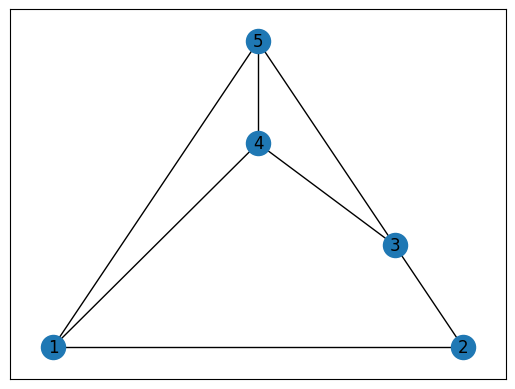

In [4]:
drawGraph(graph)

In [5]:
def eulerian_path(graph, start):
    stack = [start]
    path = []
    while stack:
        node = stack[-1]
        if node not in graph or len(graph[node]) == 0:
            # If the node has no more outgoing edges, add it to the path
            path.append(stack.pop())
        else:
            # If the node has outgoing edges, continue traversing
            adj = graph[node].pop(0)
            stack.append(adj)
    # Check if the path covers all edges in the graph
    if sum(len(edges) for edges in graph.values()) > 0:
        return None
    return path

In [6]:
eulerian_path(graph, 1)

[1, 5, 4, 5, 3, 4, 3, 2, 3, 5, 1, 4, 1, 2, 1]

## Es. 5. Algoritmo per determinare se l'arco (a,b) è un ponte

**Testo**

Supponiamo di avere un grafo connesso rappresentato come un dizionario di liste di adiacenza. Si vuole scrivere un algoritmo che determini se l'arco (a,b) è un ponte del grafo, ovvero se la rimozione di tale arco causerebbe l'aumento del numero di componenti connesse del grafo.

**Idea**

1. Calcolare il numero di nodi raggiunti da un nodo arbitrario usando il grafo originale con l'arco (a,b). Si può utilizzare l'algoritmo della ricerca in profondità o della ricerca in ampiezza per questo.
2. Rimuovere l'arco (a,b) dal grafo.
3. Calcolare il numero di nodi raggiunti da un nodo arbitrario usando il grafo senza l’arco (a, b). Ancora una volta, si può utilizzare l'algoritmo della ricerca in profondità o della ricerca in ampiezza per questo.
4. Se il numero di nodi raggiunti dalle due ricerche e’ differente, allora (a, b) e’ un arco ponte.

**Soluzione**

In [7]:
def dfs(node, visited, graph):
    visited.add(node)
    for neighbor in graph[node]:
        if neighbor not in visited:
            dfs(neighbor, visited, graph)

def is_bridge(graph, a, b):
    visited = set()
    dfs(list(graph)[0], visited, graph)
    num_components_with_edge = len(visited)
    graph[a].remove(b)
    graph[b].remove(a)
    visited = set()
    dfs(list(graph)[0], visited, graph)
    num_components_without_edge = len(visited)
    graph[a].append(b)
    graph[b].append(a)
    return num_components_without_edge != num_components_with_edge

**Esecuzione**

In [8]:
graph = {
    1 : [2, 4, 5], 
    2 : [1, 3], 
    3 : [2], 
    4 : [1, 5], 
    5 : [1, 4]
}

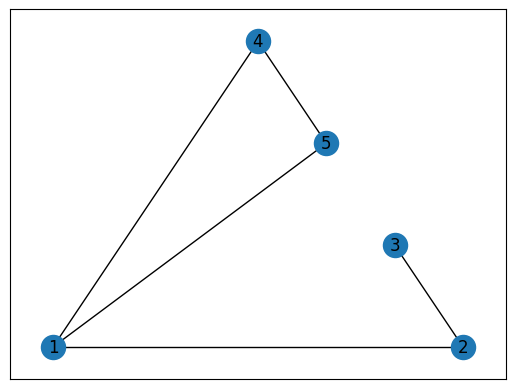

In [9]:
drawGraph(graph)

In [10]:
is_bridge(graph, 2, 1)

True

In [11]:
is_bridge(graph, 4, 5)

False